In [1]:
! python -m pip install --upgrade pip
! python -m pip install pandas
! python -m pip install numpy
! python -m pip install matplotlib
! python -m pip install scikit-learn 
! python -m pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

In [3]:
df = pd.read_csv('C:\D_Drive\WorkSpace\ds_and_ml\All_model_practice\datasets\Large_Analyst_Salaries_Dataset.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\rick2\AppData\Local\Temp\ipykernel_5152\3086795360.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('C:\D_Drive\WorkSpace\ds_and_ml\All_model_practice\datasets\Large_Analyst_Salaries_Dataset.csv')


,Company,Role,Experience Level (Years),Salary (INR in LPA)
0,Infosys,Marketing Analyst,5-7,9.3
1,Accenture,Business Analyst,2-3,6.7
2,Infosys,Financial Analyst,2-3,6.9
3,Capgemini,Financial Analyst,7+,13.0
4,Accenture,Business Analyst,3-5,8.5


In [4]:
import math
df[['Exp_lower','Exp_upper']] = df['Experience Level (Years)'].str.split('-',expand=True)
df['Experience Level (Years)'] = df['Experience Level (Years)'].astype(str)
df['Exp_upper'] = df['Exp_upper'].fillna('20')
df['Exp_lower'] = df['Exp_lower'].str.replace('+','').map(int)
df['Exp_upper'] = df['Exp_upper'].str.replace('+','').map(int)
df.head()

,Company,Role,Experience Level (Years),Salary (INR in LPA),Exp_lower,Exp_upper
0,Infosys,Marketing Analyst,5-7,9.3,5,7
1,Accenture,Business Analyst,2-3,6.7,2,3
2,Infosys,Financial Analyst,2-3,6.9,2,3
3,Capgemini,Financial Analyst,7+,13.0,7,20
4,Accenture,Business Analyst,3-5,8.5,3,5


In [5]:
reg = linear_model.LinearRegression()
reg.fit(df[['Exp_lower','Exp_upper']], df['Salary (INR in LPA)'])

LinearRegression()

In [6]:
reg.predict([[3,4]])# Predicting salary for 2 to 5 years of experience

c:\Users\rick2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.6888245])

In [7]:
reg.coef_
reg.intercept_

np.float64(4.429344030135159)

In [8]:
reg.score(df[['Exp_lower','Exp_upper']], df['Salary (INR in LPA)']) # R^2 score

0.9061990892079922

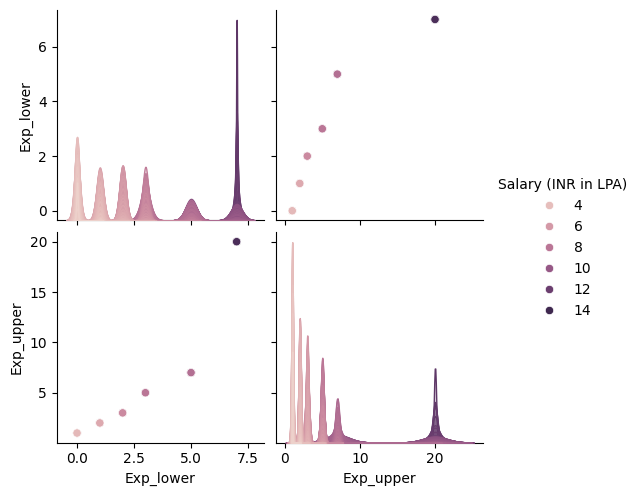

In [9]:
import seaborn as sns
sns.pairplot(df, hue='Salary (INR in LPA)')

AttributeError: module 'matplotlib.pyplot' has no attribute 'zlabel'

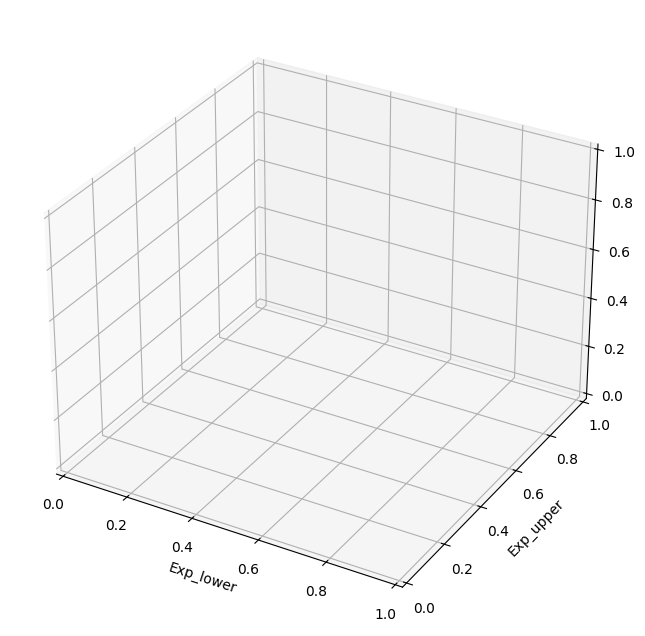

In [10]:
%matplotlib inline
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
plt.xlabel('Exp_lower')
plt.ylabel('Exp_upper')
plt.zlabel('Salary (INR in LPA)')

plt.xlim(0, 10000)
plt.ylim(0, 50000000)
plt.scatter(df['Exp_lower'], df['Exp_upper'], df['Salary (INR in LPA)'], color='red', marker='o')
plt.ticklabel_format(style='plain', axis='both')
plt.title('Exp vs Salary')
plt.show()